Text: 
 b'Gender Bender sexes things up a bit for the x-files. This episode has an interesting premise, a good story, but an ending that is wanting. Gender Bender is also the x-files debut for actor Nicholas Lea, better known as Alex Krycek. In this episode he plays Michael, a man attacked by one of "The Kindred". You need to see this episode just to see Nic Lea\'s less than spectacular beginning. An interesting thing about the Kindred\'s "power of seduction". When Marty does it to his victims, they become turned onto him/her. However, when Andrew seduces Scully, she only because disoriented and groggy, and does not become attracted to Andrew. Maybe it\'s because Marty has more experience at it than Andrew. This episode reminds me of why it would sometimes be miserable to film up in British Columbia. Throughout the episode it is so wet, soggy, and muddy, it could not have been that much fun. Despite the disappointing ending, Gender Bender is still a decent episode to view.'

Label: 1
o

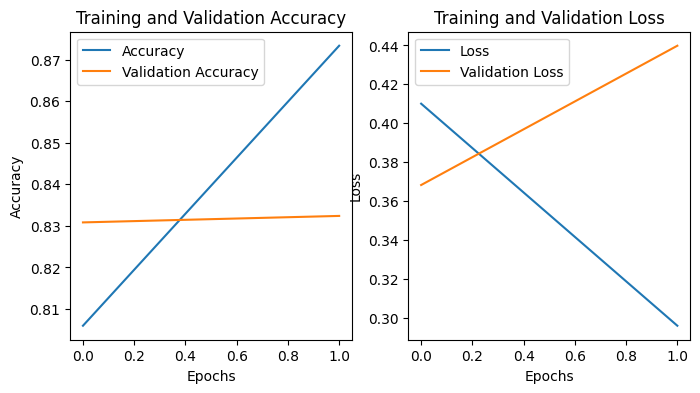

1/1 [==============================] - 6s 6s/step
2.7870245
The review is positive


In [ ]:

import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt


# Obtain the imdb review dataset from tensorflow datasets
dataset = tfds.load('imdb_reviews', as_supervised=True)
# Seperate test and train datasets
train_dataset, test_dataset = dataset['train'], dataset['test']
# Split the test and train data into batches of 32
# and shuffling the training set
batch_size = 32
train_dataset = train_dataset.shuffle (10000)
train_dataset = train_dataset.batch (batch_size)
test_dataset = test_dataset.batch(batch_size)



#Printing a sample review and its label from the training set.
example, label = next(iter(train_dataset))
print('Text: \n', example.numpy()[0])
print('\nLabel:', label.numpy()[0])





#Build the Modle
#Text Vectorization
#Using the TextVectorization layer to normalize, split, and map strings
#to integers.
encoder = tf.keras.layers.TextVectorization(max_tokens=10000)
encoder.adapt(train_dataset.map(lambda text,_:text))


# Extracting the vocabulary from the TextVectorization layer.
vocabulary = np.array(encoder.get_vocabulary())
# Encoding a test example and decoding it back.
original_text = example.numpy()[0]
encoded_text = encoder (original_text).numpy()
decoded_text = ' '.join(vocabulary [encoded_text])

print('original:', original_text)
print('encoded: ', encoded_text)
print('decoded:', decoded_text)




#Creating the model
model = tf.keras.Sequential([
encoder,
tf.keras.layers. Embedding(
len(encoder.get_vocabulary()), 64, mask_zero=True),
 tf.keras.layers.Bidirectional(
tf.keras.layers.LSTM(64, return_sequences=True)),
tf.keras.layers.Bidirectional (tf.keras.layers.LSTM(32)), tf.keras.layers.Dense (64, activation= 'relu'), tf.keras.layers.Dense(1)
])


# Summary of the model
model.summary()

# Compile the model
model.compile(
  loss=tf.keras.losses.BinaryCrossentropy (from_logits=True),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=['accuracy']
)


# Training the model and validating it on test set
history = model.fit(
  train_dataset, epochs=2,
  validation_data=test_dataset,)


#Plotting the accuracy and loss over time 2 # Training history
history_dict = history.history
#Seperating validation and training accuracy
acc=history_dict['accuracy']
val_acc = history_dict['val_accuracy']
#Seperating validation and training loss
loss=history_dict['loss']
val_loss = history_dict['val_loss']

#Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])
plt.show()



# Making predictions
sample_text = (
'''The movie by GeeksforGeeks was so good and the animation are so dope. I would recommend my friends to watch it.'''
)
predictions = model.predict(np.array([sample_text]))
print(*predictions[0])

 # Print the label based on the prediction
if predictions[0] > 0:
  print('The review is positive')
else:
  print('The review is negative')



